# Evaluate overall classification thresholds

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set_theme()

In [4]:
thresholds = np.arange(0.1,1.1,0.1)

In [5]:
def calculate_accuracies(labels, class_probabilities, thresholds):
    true_labels = list(labels)
    accuracies = []
    for threshold in thresholds:
        predicted_labels = [1 if i >= threshold else 0 for i in list(class_probabilities)]
        accuracy = round(accuracy_score(true_labels, predicted_labels), 2)
        accuracies.append(accuracy)
        print(round(threshold, 1), accuracy)
    return accuracies

In [6]:
def plot_accuracies(model_name, accuracies, thresholds, test_set_size):
    plt.plot(thresholds, accuracies, marker='o')
    plt.xticks(thresholds)
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.title(f'Test set accuracy at different classification thresholds for {model_name}\nTest set size: {test_set_size}')
    plt.show()

## Evaluate random forest

Data used for training: KAZABengoCrop2020Random20000

Run this [script](https://github.com/alexvmt/farm_plot_detection/blob/main/earth_engine_scripts/random_forest_kaza_bengo_crop_2020.js) in Google Earth Engine to export the desired class probablities. Then, download them from Google Drive and copy them to the correct directory.

In [7]:
directory = '../processed_data/classification_threshold_evaluation/random_forest'

### Load test set labels and predicted test set class probabilities

In [8]:
file = 'predicted_class_probabilities.csv'
path = os.path.join(directory, file)
predicted_class_probabilities = pd.read_csv(path)
predicted_class_probabilities

,system:index,B2,B3,B4,B8,NDVI,classification,crop,.geo
0,00000000000000003e80_0,0.012521,0.013921,0.011386,0.011879,0.013986,0.022450,0,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,00000000000000003e85_0,0.029833,0.044433,0.038533,0.220833,0.702531,0.195416,0,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,00000000000000003e87_0,0.033800,0.058050,0.046600,0.258000,0.694182,0.084837,0,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,00000000000000003e89_0,0.037100,0.056600,0.054800,0.223867,0.607035,0.256949,0,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,00000000000000003e8b_0,0.027350,0.044075,0.044575,0.215150,0.656845,0.073527,0,"{""type"":""MultiPoint"",""coordinates"":[]}"
...,...,...,...,...,...,...,...,...,...
3995,00000000000000004e12_0,0.091667,0.123289,0.150733,0.292356,0.319329,0.790826,1,"{""type"":""MultiPoint"",""coordinates"":[]}"
3996,00000000000000004e16_0,0.061860,0.082040,0.094260,0.191520,0.340977,0.454751,1,"{""type"":""MultiPoint"",""coordinates"":[]}"
3997,00000000000000004e18_0,0.058160,0.086840,0.108380,0.253440,0.403410,0.610969,1,"{""type"":""MultiPoint"",""coordinates"":[]}"
3998,00000000000000004e1b_0,0.045850,0.063750,0.066250,0.226650,0.547808,0.243752,1,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [9]:
predicted_class_probabilities['crop'].value_counts()

0    2043
1    1957
Name: crop, dtype: int64

### Calculate test set accuracy at different thresholds

In [10]:
accuracies_rf = calculate_accuracies(predicted_class_probabilities['crop'], predicted_class_probabilities['classification'], thresholds)

0.1 0.56
0.2 0.64
0.3 0.7
0.4 0.73
0.5 0.74
0.6 0.74
0.7 0.71
0.8 0.66
0.9 0.59
1.0 0.51


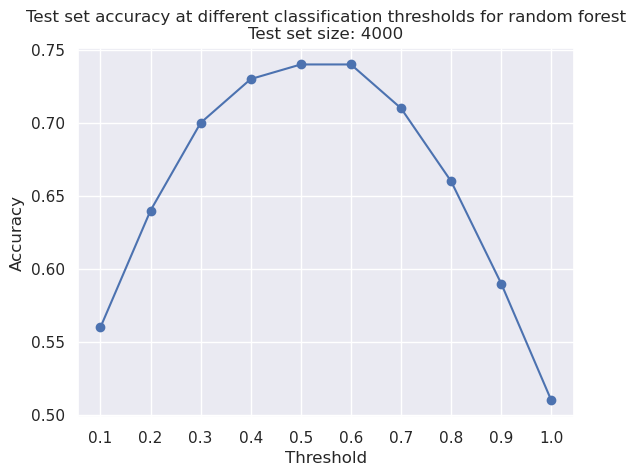

In [11]:
plot_accuracies('random forest', accuracies_rf, thresholds, predicted_class_probabilities.shape[0])

## Evaluate OpenMapFlow model

Data used for training: GeowikiLandcover2017 and KAZABengoCrop2020Random2000

Get the test set labels and predicted test set class probablities from this [notebook](https://github.com/alexvmt/farm_plot_detection/blob/main/create_maps_for_small_regions.ipynb) through modifying `evaluate.py` to print the respective values. Save them in a text file, download them and copy them to the right directory.

In [12]:
directory = '../processed_data/classification_threshold_evaluation/openmapflow'

### Load test set labels

In [13]:
file = 'y_true.txt'
path = os.path.join(directory, file)
y_true = pd.read_csv(path, sep=' ', names=['y_true'])
y_true

,y_true
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
423,1.0
424,0.0
425,0.0
426,1.0


### Load predicted test set class probabilities

In [14]:
file = 'y_score.txt'
path = os.path.join(directory, file)
y_score = pd.read_csv(path, sep=' ', names=['y_score'])
y_score

,y_score
0,0.060221
1,0.064586
2,0.640205
3,0.497576
4,0.941447
...,...
423,0.165784
424,0.005387
425,0.819797
426,0.915841


### Calculate test set accuracy at different thresholds

In [15]:
accuracies_omf = calculate_accuracies(y_true['y_true'], y_score['y_score'], thresholds)

0.1 0.58
0.2 0.68
0.3 0.74
0.4 0.78
0.5 0.75
0.6 0.74
0.7 0.7
0.8 0.64
0.9 0.57
1.0 0.51


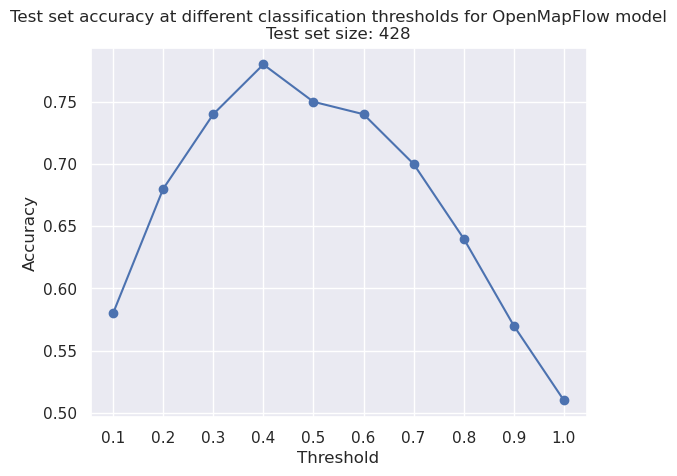

In [16]:
plot_accuracies('OpenMapFlow model', accuracies_omf, thresholds, y_true.shape[0])